<a href="https://colab.research.google.com/github/ucl-casa-ce/casa0018/blob/main/Week3/CASA0018_3_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST
This example MNIST database. Information on the NMIST character dataset can be found [here](http://yann.lecun.com/exdb/mnist/).

# Importing dependencies
Let's start by importing TensorFlow, printing out the version number and create an object that points to the MNIST data via the tf.keras datasets API. How did we know where the dataset was? TensorFlow Datasets provide a list of resources that are easily accessible in the Colabs - a catalogue of what is availabe is at: https://www.tensorflow.org/datasets/catalog/overview)


In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist

2.3.0



# Loading the image data
Calling **load_data** on the **mnist** object will give you two sets of lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Exploring the data and preparing it for use
What does these values look like? We are going to import a library that helps us display an image and point it to a training image, and a training label to see. Experiment with different indices in the array.


shape: (28, 28)
Label: 5


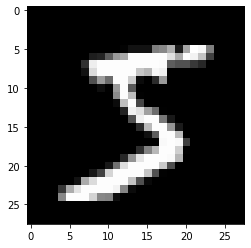

In [ ]:
sample = 0;
print("shape:", training_images[sample].shape)

import matplotlib.pyplot as plt
plt.imshow(training_images[sample], cmap='gray')
print("Label:", training_labels[sample])


Each of the 'pixel' values above are between 0 (black) and 255 (white). 

To '**normalize**' the data between 0 and 1, in Python we just need to divide all values by 255.0:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Building the model
To create the sequence of layers in a model we use  '**Sequential**'. The model has 3 layers. First layer is called '**Flatten**' which takes the square image (28x28 pixels) and turns it into a 1 dimensional set. The second layer '**Dense**' has 24 neurons and the 3rd layer '**Dense**' has 10 neurons. Note the input to the model is a 28x28 image and the output is one of 10 neurons which relates to the 10 fashion categories. 

The activition functions are code that runs when the model is training - '**relu**' (Rectified Linear Unit - ReLU) converts any negative value to zero, '**softmax**' looks at all the probabilities in that layer of neurons and sets the highest value to 1 and all the others to 0 - this makes it programatically easier to find the most likely solution.  

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(24, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                18840     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                250       
Total params: 19,090
Trainable params: 19,090
Non-trainable params: 0
_________________________________________________________________


After defining the model we build it by compiling with an optimizer and loss function and then train it by calling **model.fit** to fit your training data to your training labels. 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3921 - accuracy: 0.8910
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2241 - accuracy: 0.9357
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1793 - accuracy: 0.9481
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1540 - accuracy: 0.9546
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1368 - accuracy: 0.9592


The accuracy value at the end of the final epoch is about 0.95 or about 95% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 95% of the time. 

Next we can call '**model.evaluate**', and pass in the test data, and it will report back the loss for each. Let's give it a try:

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9579


[0.14333797991275787, 0.9578999876976013]

For me, that returned a accuracy of about .9579, which means it was about 95% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  